<a href="https://colab.research.google.com/github/kwisetree/AIFFEL_quest_cr/blob/main/Exploration/SubQuestC28/SubQuestC28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#프로젝트: 이제까지 만들었던 모델을 튜닝하고 배포하기

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [ ]:
# 1. 데이터 불러오기 및 전처리
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # 정규화
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
# 2. 모델 구성
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.AveragePooling2D((2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.AveragePooling2D((2, 2)),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 3. 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 4. 학습
model.fit(x_train, y_train,
          epochs=20,
          batch_size=64,
          validation_split=0.2)

# 5. 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"테스트 정확도: {test_acc:.4f}")


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 92ms/step - accuracy: 0.3744 - loss: 2.0882 - val_accuracy: 0.4577 - val_loss: 1.4648
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 90ms/step - accuracy: 0.5834 - loss: 1.1924 - val_accuracy: 0.5219 - val_loss: 1.4137
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 91ms/step - accuracy: 0.6542 - loss: 0.9832 - val_accuracy: 0.6373 - val_loss: 1.0497
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 89ms/step - accuracy: 0.7026 - loss: 0.8500 - val_accuracy: 0.6660 - val_loss: 0.9592
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 91ms/step - accuracy: 0.7308 - loss: 0.7560 - val_accuracy: 0.6720 - val_loss: 0.9444
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.7569 - loss: 0.6881 - val_accuracy: 0.6605 - val_loss: 0.9772
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 90ms/step - accuracy: 0.7795 - loss: 0.6171 - val_accuracy: 0.7000 - val_loss: 0.8780
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 91ms/step - accuracy: 0.8042 - loss: 0.5574 - 

## 0. 모델 고정해서 사용하기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, BatchNormalization, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    AveragePooling2D(pool_size=(2,2)),
    BatchNormalization(),

    Conv2D(64, (3,3), activation='relu'),
    AveragePooling2D(pool_size=(2,2)),
    BatchNormalization(),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 15, 15, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 15, 15, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 6, 6, 64)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 6, 6, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 612,426 (2.34 MB)

 Trainable params: 612,234 (2.34 MB)

 Non-trainable params: 192 (768.00 B)

## 1. Data-Centric AI: 잘못된 라벨 수정하기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# CIFAR-10 불러오기
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# /content/ 폴더에 저장
np.save('/content/x_train.npy', x_train)
np.save('/content/y_train.npy', y_train)
np.save('/content/x_test.npy', x_test)
np.save('/content/y_test.npy', y_test)

print("데이터 저장 완료!")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
데이터 저장 완료!


In [ ]:
# CIFAR-10 클래스 라벨 정의
cifar10_labels = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

# 확인용 출력
for label_num, label_name in cifar10_labels.items():
    print(f"{label_num}: {label_name}")


0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck


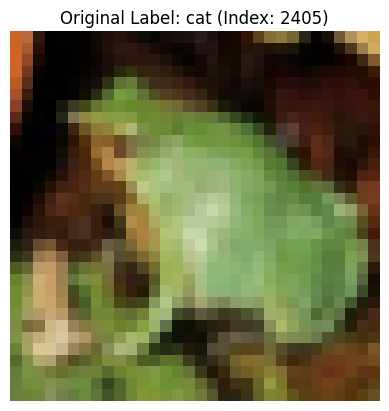

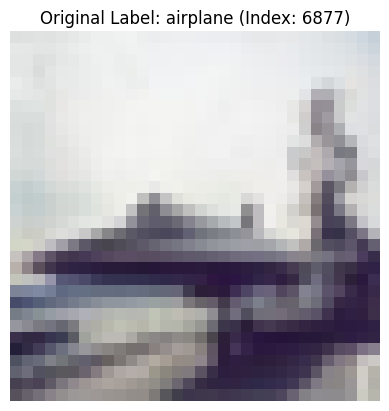

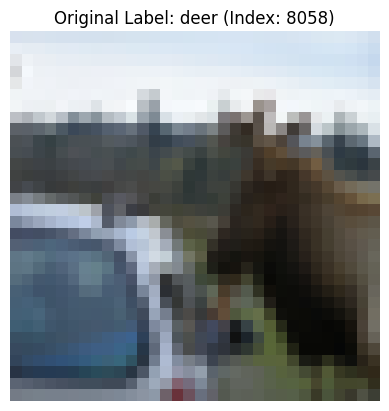

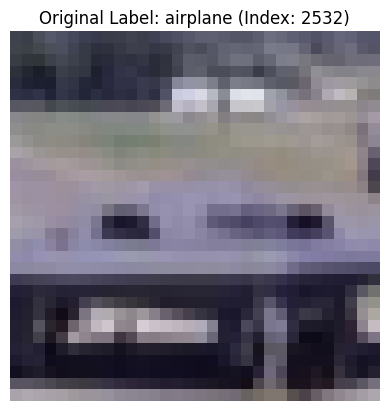

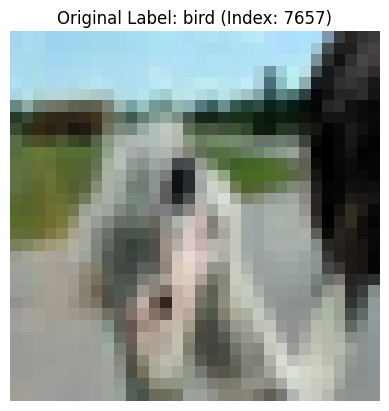

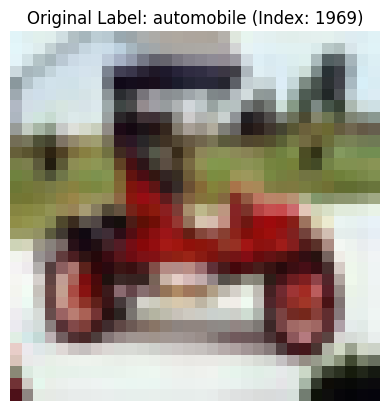

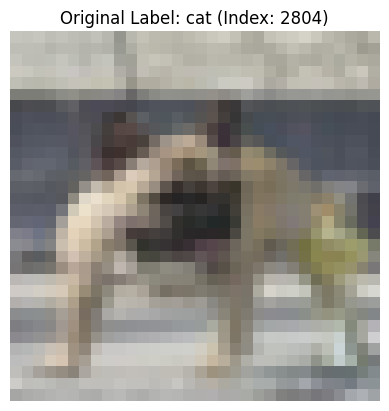

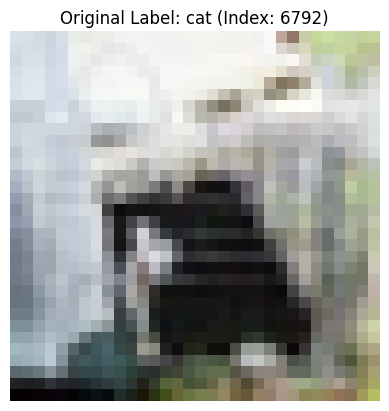

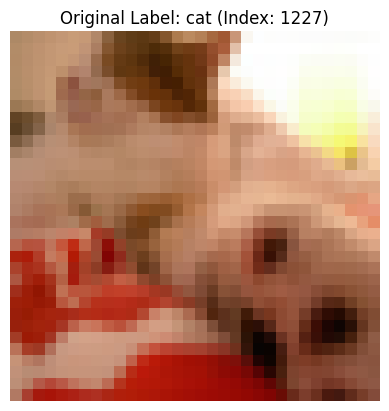

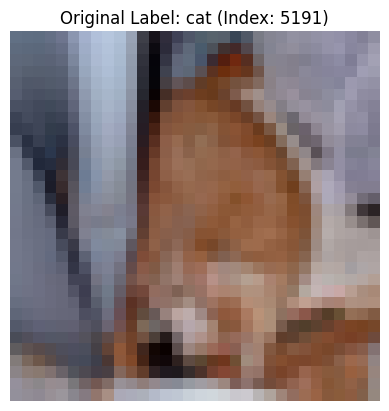

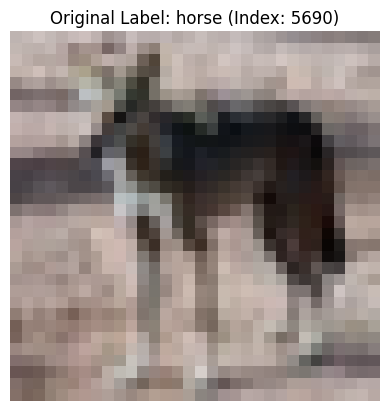

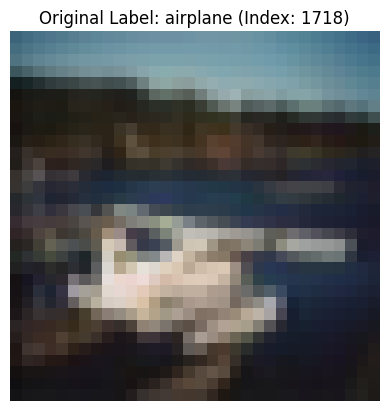

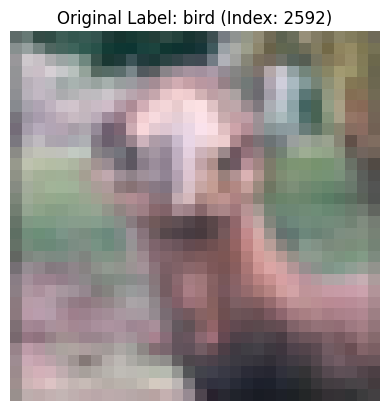

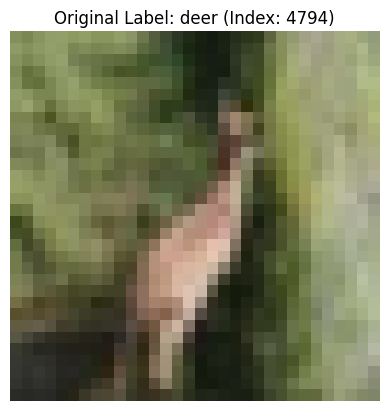

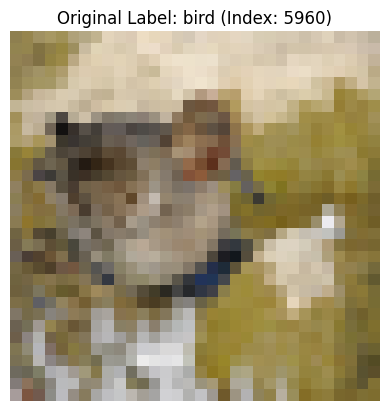

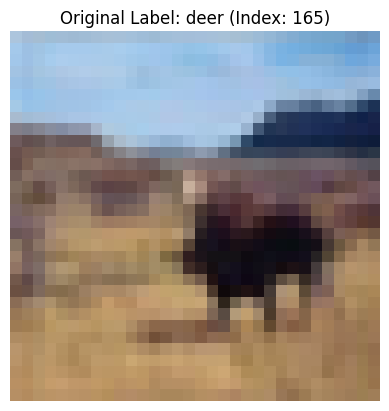

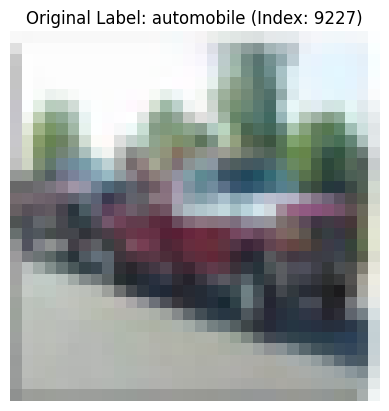

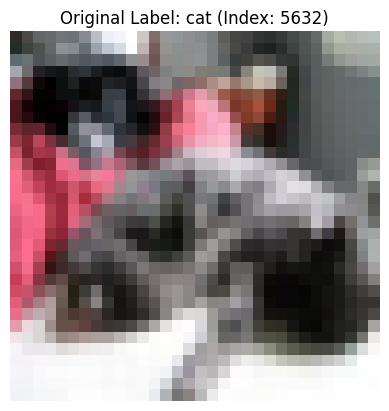

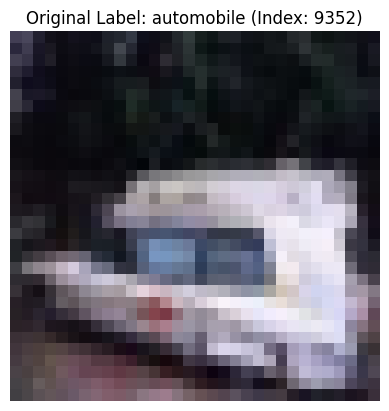

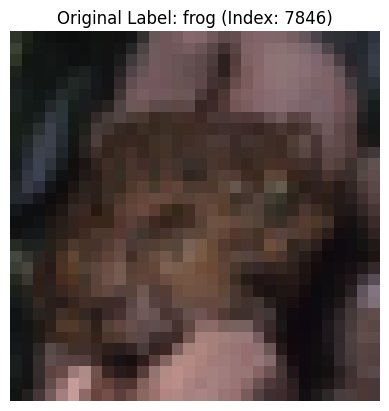

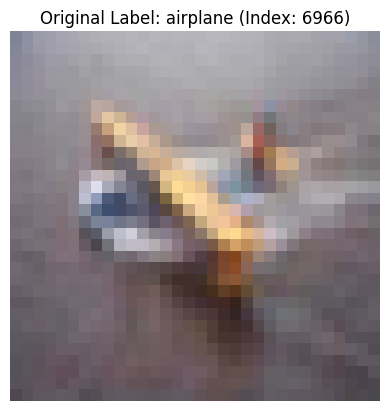

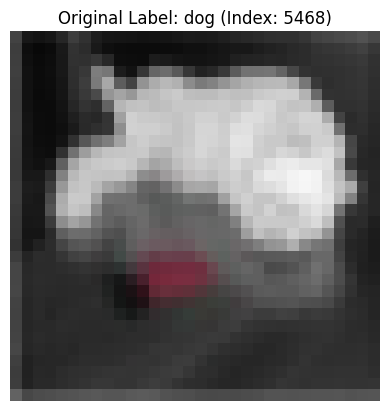

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# 1. CIFAR-10 데이터셋 불러오기
(_, _), (x_test, y_test) = cifar10.load_data()

# 2. 클래스 이름 정의
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# labelerrors.com에서 확인한 오라클(검수) ID 목록 예시
# 예: labelerrors.com에서 잘못되었다고 표시된 테스트셋의 인덱스
error_indices = [2405, 6877, 8058, 2532, 7657, 1969, 2804, 6792, 1227, 5191, 5690, 1718, 2592, 4794, 5960, 165, 9227, 5632, 9352, 7846, 6966, 5468]

# 4. 시각화하고 확인
for idx in error_indices:
    plt.imshow(x_test[idx])
    plt.title(f"Original Label: {class_names[y_test[idx][0]]} (Index: {idx})")
    plt.axis('off')
    plt.show()


ID 2405 - 수정 전 라벨: cat
ID 2405 - 수정 후 라벨: frog


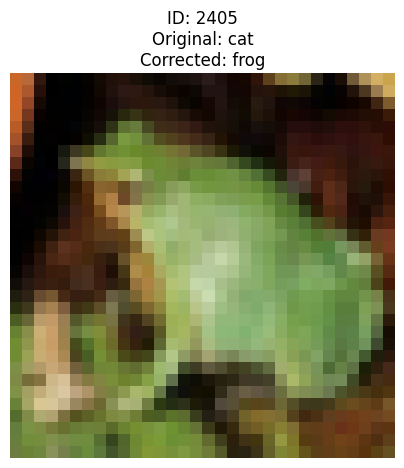

다음 이미지를 보려면 Enter 키를 누르세요...
ID 6877 - 수정 전 라벨: airplane
ID 6877 - 수정 후 라벨: ship


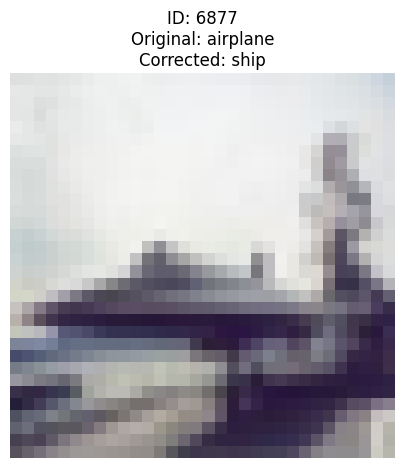

다음 이미지를 보려면 Enter 키를 누르세요...
ID 8058 - 수정 전 라벨: deer
ID 8058 - 수정 후 라벨: horse


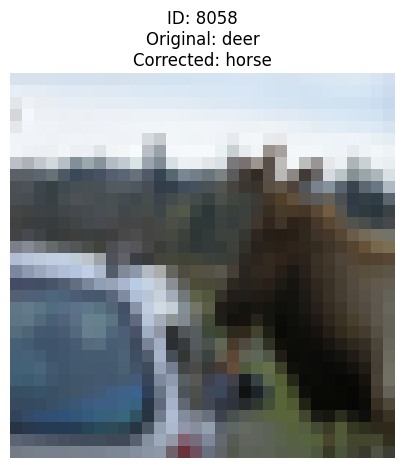

다음 이미지를 보려면 Enter 키를 누르세요...
ID 2532 - 수정 전 라벨: airplane
ID 2532 - 수정 후 라벨: automobile


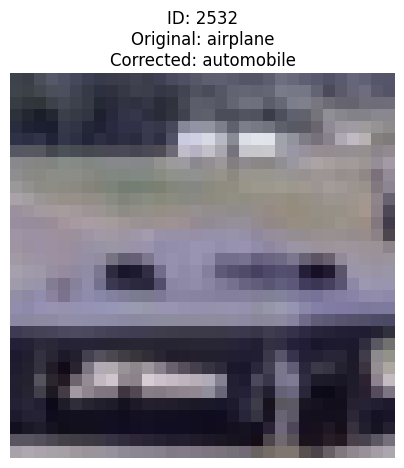

다음 이미지를 보려면 Enter 키를 누르세요...
ID 7657 - 수정 전 라벨: bird
ID 7657 - 수정 후 라벨: ship


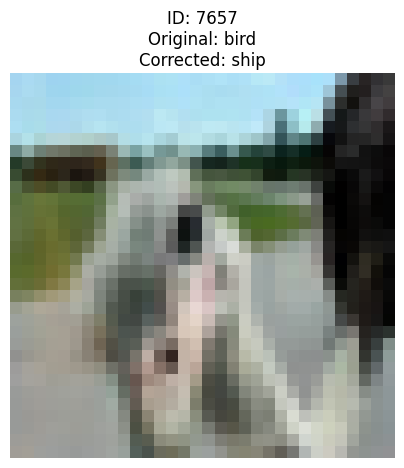

다음 이미지를 보려면 Enter 키를 누르세요...
ID 1969 - 수정 전 라벨: automobile
ID 1969 - 수정 후 라벨: truck


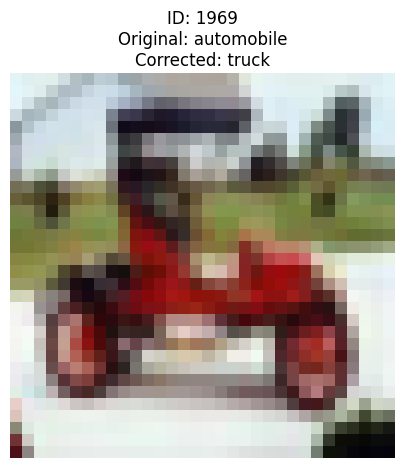

다음 이미지를 보려면 Enter 키를 누르세요...
ID 2804 - 수정 전 라벨: cat
ID 2804 - 수정 후 라벨: dog


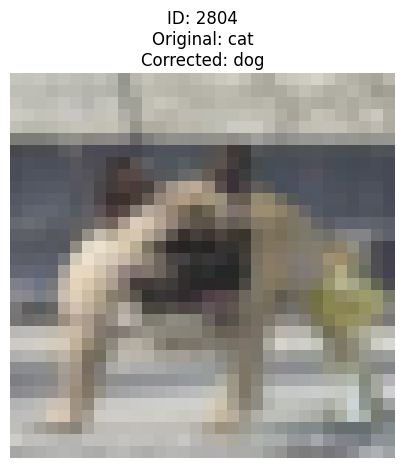

다음 이미지를 보려면 Enter 키를 누르세요...
ID 6792 - 수정 전 라벨: cat
ID 6792 - 수정 후 라벨: truck


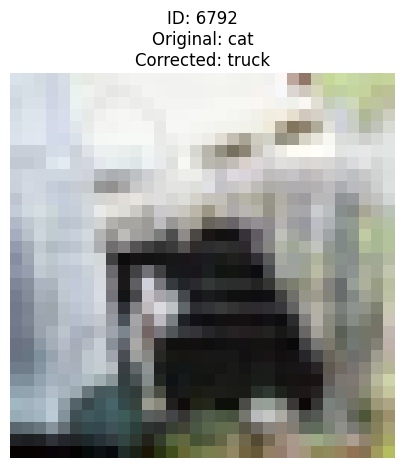

다음 이미지를 보려면 Enter 키를 누르세요...
ID 1227 - 수정 전 라벨: cat
ID 1227 - 수정 후 라벨: dog


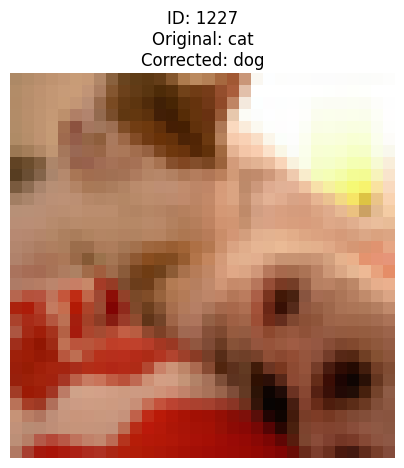

다음 이미지를 보려면 Enter 키를 누르세요...
ID 5191 - 수정 전 라벨: cat
ID 5191 - 수정 후 라벨: dog


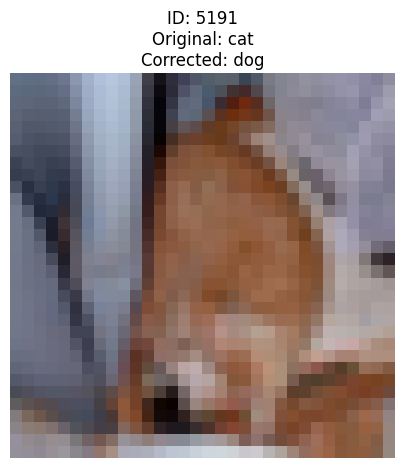

다음 이미지를 보려면 Enter 키를 누르세요...
ID 5690 - 수정 전 라벨: horse
ID 5690 - 수정 후 라벨: deer


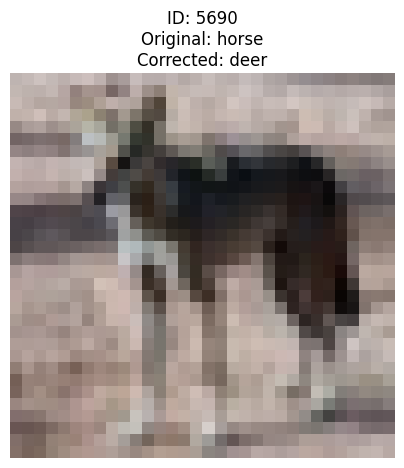

다음 이미지를 보려면 Enter 키를 누르세요...
ID 1718 - 수정 전 라벨: airplane
ID 1718 - 수정 후 라벨: ship


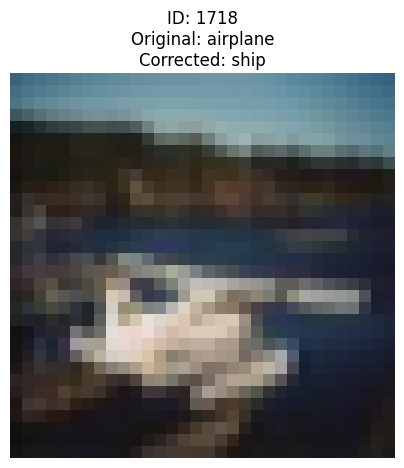

다음 이미지를 보려면 Enter 키를 누르세요...
ID 2592 - 수정 전 라벨: bird
ID 2592 - 수정 후 라벨: deer


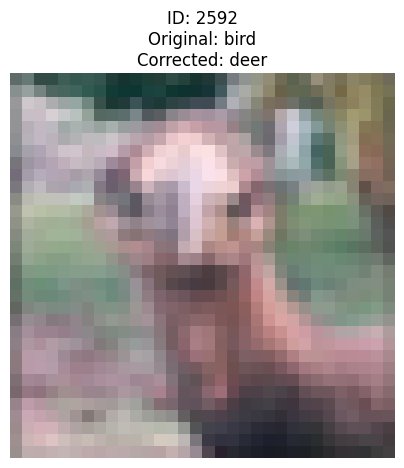

다음 이미지를 보려면 Enter 키를 누르세요...
ID 4794 - 수정 전 라벨: deer
ID 4794 - 수정 후 라벨: bird


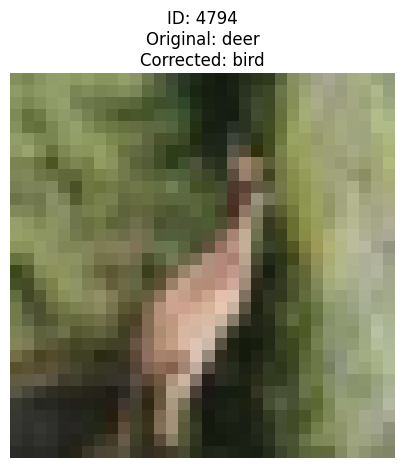

다음 이미지를 보려면 Enter 키를 누르세요...
ID 5960 - 수정 전 라벨: bird
ID 5960 - 수정 후 라벨: cat


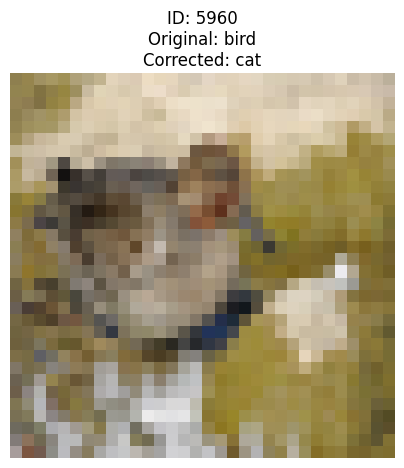

다음 이미지를 보려면 Enter 키를 누르세요...
ID 165 - 수정 전 라벨: deer
ID 165 - 수정 후 라벨: bird


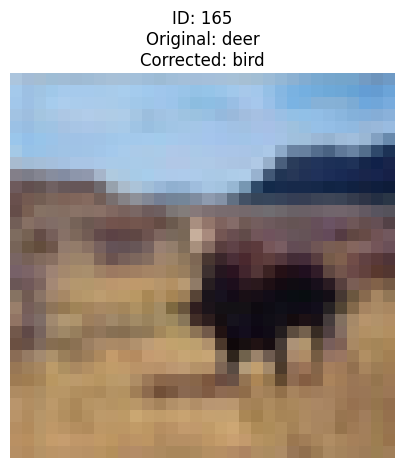

다음 이미지를 보려면 Enter 키를 누르세요...
ID 9227 - 수정 전 라벨: automobile
ID 9227 - 수정 후 라벨: truck


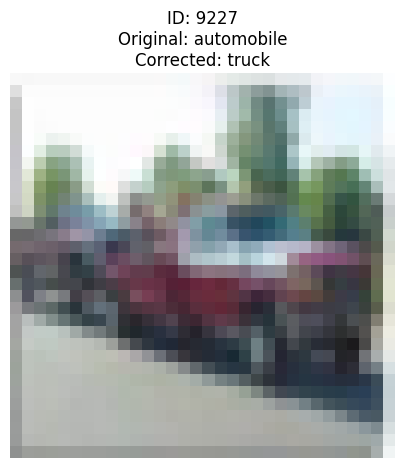

다음 이미지를 보려면 Enter 키를 누르세요...
ID 5632 - 수정 전 라벨: cat
ID 5632 - 수정 후 라벨: dog


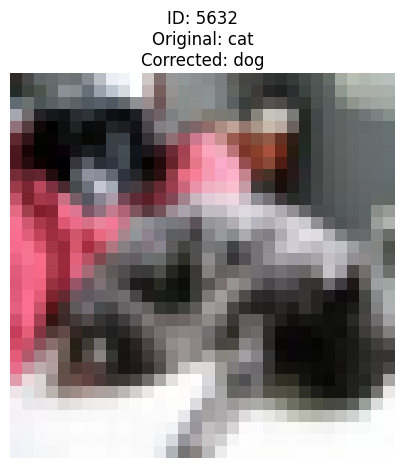

다음 이미지를 보려면 Enter 키를 누르세요...
ID 9352 - 수정 전 라벨: automobile
ID 9352 - 수정 후 라벨: truck


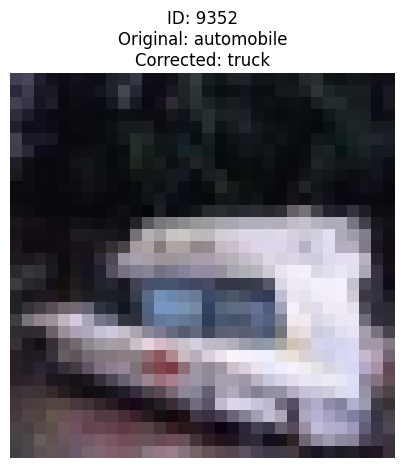

다음 이미지를 보려면 Enter 키를 누르세요...
ID 7846 - 수정 전 라벨: frog
ID 7846 - 수정 후 라벨: cat


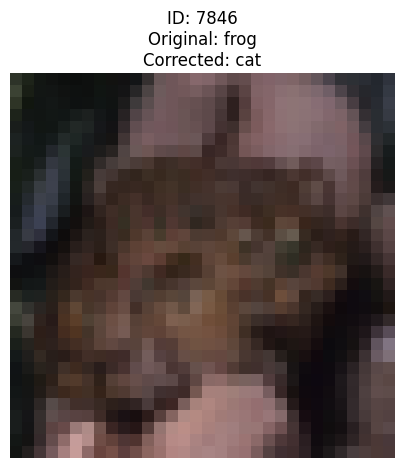

다음 이미지를 보려면 Enter 키를 누르세요...
ID 6966 - 수정 전 라벨: airplane
ID 6966 - 수정 후 라벨: ship


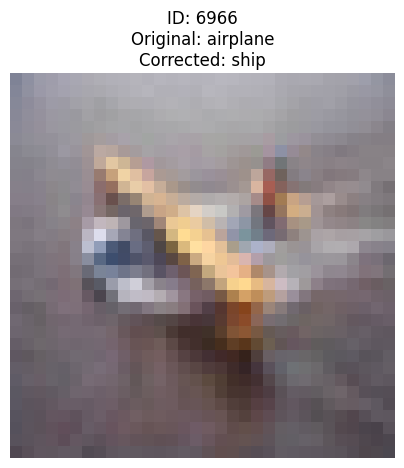

다음 이미지를 보려면 Enter 키를 누르세요...
ID 5468 - 수정 전 라벨: dog
ID 5468 - 수정 후 라벨: cat


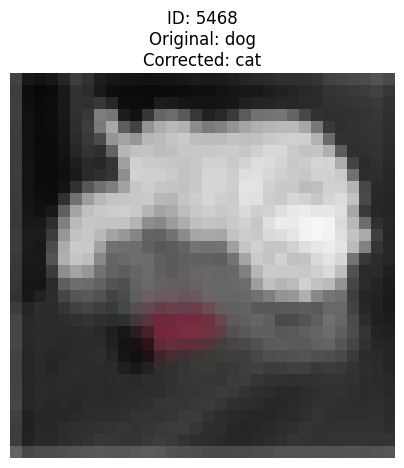

다음 이미지를 보려면 Enter 키를 누르세요...
모든 이미지의 라벨이 수정되었습니다.


In [ ]:
# 수정할 ID와 라벨 매핑
corrections = {
    2405: 6,
    6877: 8,
    8058: 7,
    2532: 1,
    7657: 8,
    1969: 9,
    2804: 5,
    6792: 9,
    1227: 5,
    5191: 5,
    5690: 4,
    1718: 8,
    2592: 4,
    4794: 2,
    5960: 3,
    165: 2,
    9227: 9,
    5632: 5,
    9352: 9,
    7846: 3,
    6966: 8,
    5468: 3
}

# 각 이미지를 개별적으로 수정하고 시각화
for idx, new_label in corrections.items():
    # 수정 전 라벨 출력
    print(f"ID {idx} - 수정 전 라벨: {class_names[y_test[idx][0]]}")

    # 라벨 수정
    original_label = y_test[idx][0]
    y_test[idx][0] = new_label

    # 수정 후 라벨 출력
    print(f"ID {idx} - 수정 후 라벨: {class_names[y_test[idx][0]]}")

    # 이미지 시각화
    plt.figure(figsize=(5, 5))
    plt.imshow(x_test[idx])
    plt.title(f"ID: {idx}\nOriginal: {class_names[original_label]}\nCorrected: {class_names[new_label]}")
    plt.axis('off')
    plt.show()

    # 다음 이미지로 넘어가기 전에 사용자 입력 대기 (선택 사항)
    input("다음 이미지를 보려면 Enter 키를 누르세요...")

print("모든 이미지의 라벨이 수정되었습니다.")

## 2. 하이퍼파라미터 튜닝

In [ ]:
!pip install keras-tuner
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam

def build_model(hp):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
        AveragePooling2D(pool_size=(2,2)),
        BatchNormalization(),

        Conv2D(64, (3,3), activation='relu'),
        AveragePooling2D(pool_size=(2,2)),
        BatchNormalization(),

        Flatten(),
        Dense(
            hp.Int("dense_units", min_value=128, max_value=512, step=64),
            activation='relu'
        ),
        Dropout(hp.Float("dropout_rate", min_value=0.3, max_value=0.7, step=0.1)),
        Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer=Adam(hp.Float("learning_rate", 1e-4, 1e-2, sampling="log")),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory='my_tuner',
    project_name='cifar10_tuning'
)

tuner.search(x_train, y_train, epochs=10, validation_split=0.2)
best_model = tuner.get_best_models(num_models=1)[0]
best_model.export("/content/saved_model/cifar10_model")

Reloading Tuner from my_tuner/cifar10_tuning/tuner0.json
Saved artifact at '/content/saved_model/cifar10_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  136230978484176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136230978484560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136230978478224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136231452842832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136230978480720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136230978478032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136231452848592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136230978482256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136230978479568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1362312934

In [ ]:
## 모델 다운 받아서 다른곳에 가져가기용 압축

import shutil
shutil.make_archive('/content/best_cifar10_model', 'zip', '/content/saved_model/cifar10_model')

'/content/best_cifar10_model.zip'

##3. TFServing

In [ ]:
tensorflow_model_server --port=8500 \
--rest_api_port=8501 \
--model_name=my_model \
--model_base_path=/mnt/c/Users/user/Desktop/best_cifar10_model

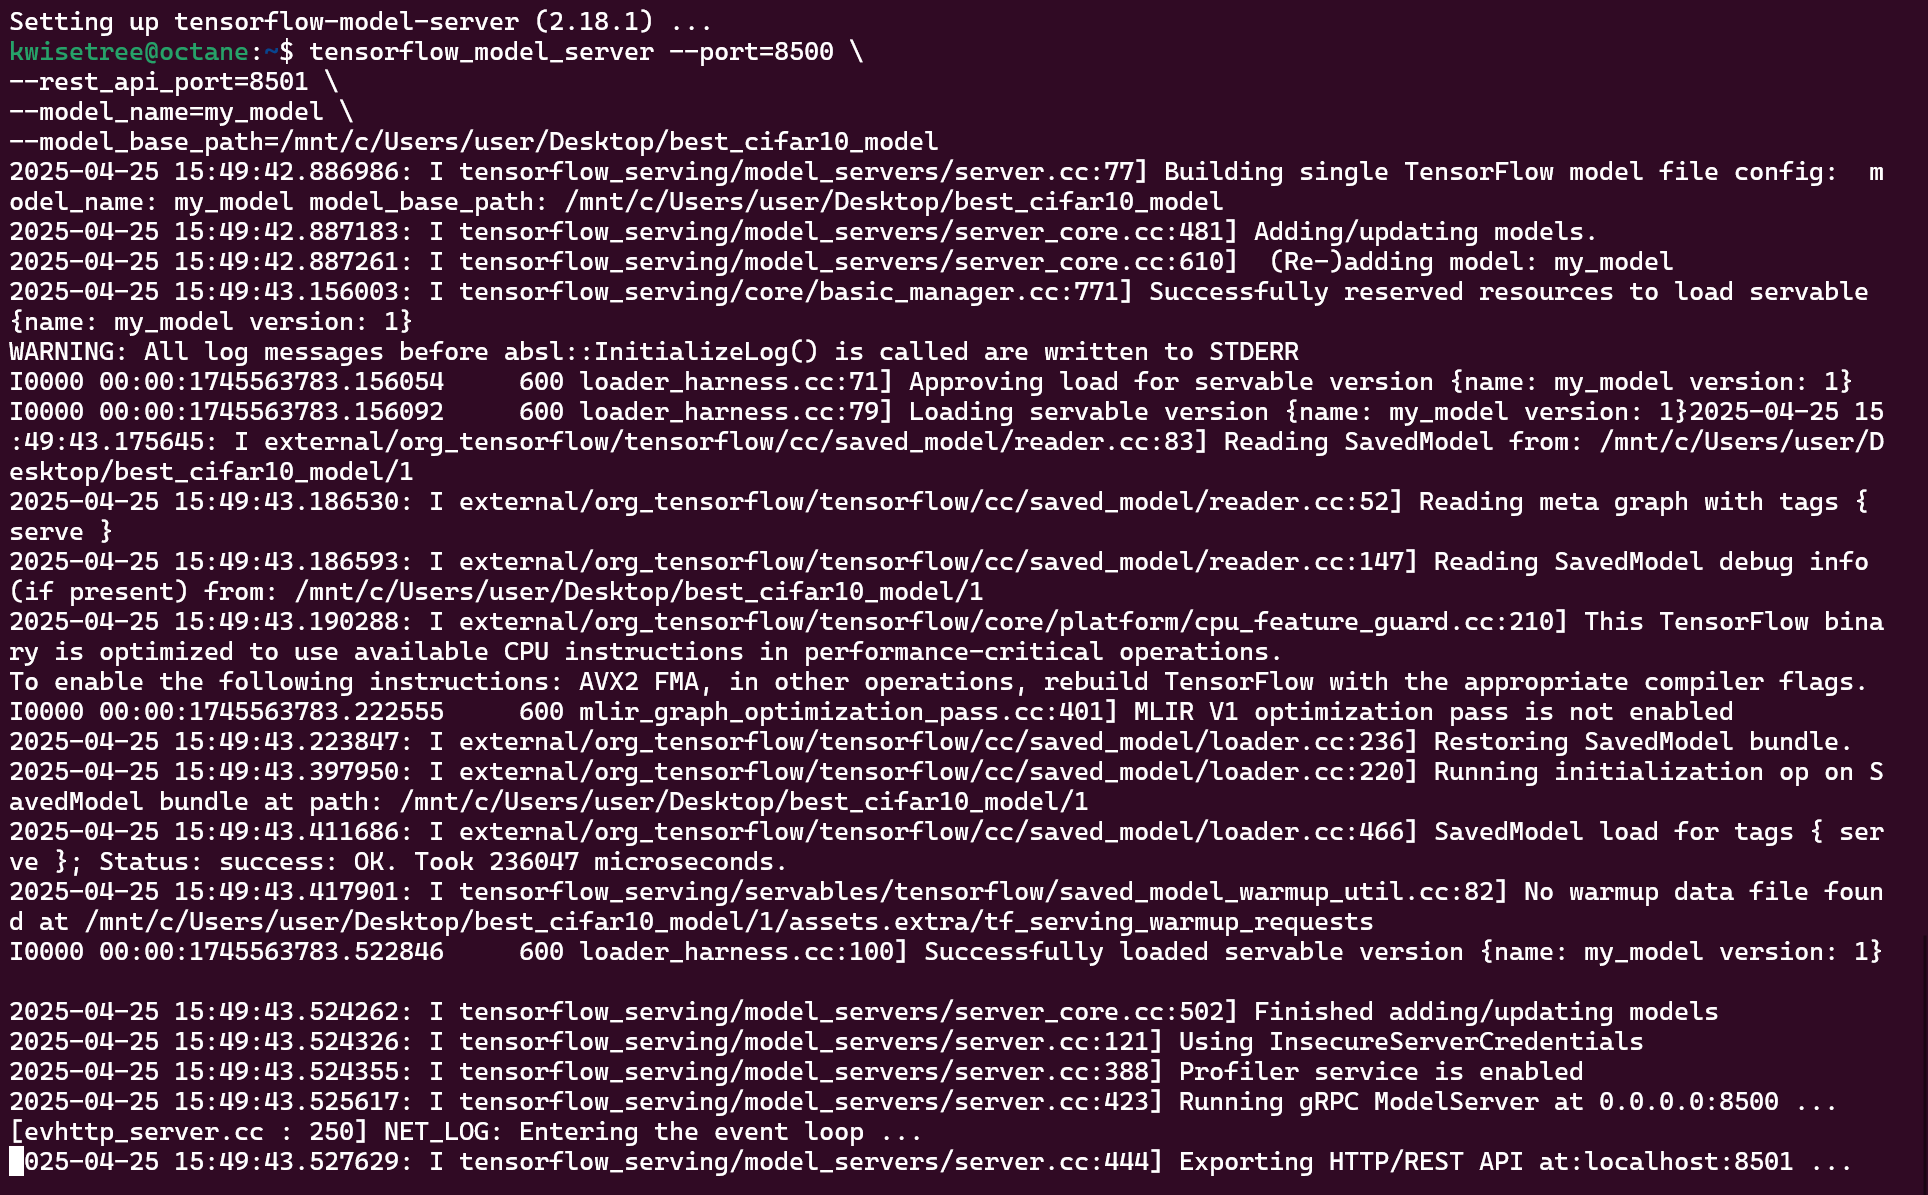

In [13]:
import numpy as np
import json

# CIFAR-10 형식 이미지 더미 데이터 생성 (32x32x3)
dummy_input = np.zeros((1, 32, 32, 3)).tolist()

request_data = {
    "signature_name": "serving_default",
    "instances": dummy_input
}

with open("input.json", "w") as f:
    json.dump(request_data, f)

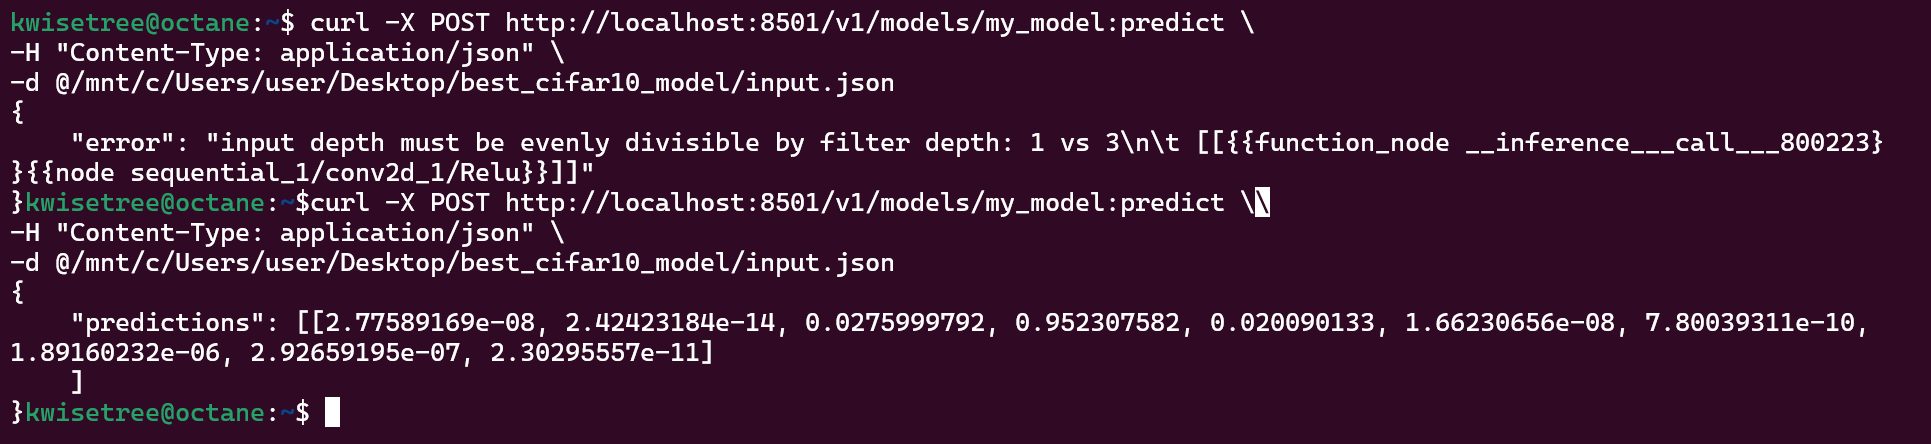

위 값들은 각 클래스에 대한 확률값임 CIFAR-10 데이터셋의 클래스 순서대로:
---
- 0: 비행기 (2.77e-08, 거의 0%)
- 1: 자동차 (2.42e-14, 거의 0%)
- 2: 새 (0.0276, 약 2.8%)
- 3: 고양이 (0.9523, 약 95.2%)
- 4: 사슴 (0.0201, 약 2.0%)
- 5~9: (매우 낮은 확률)
---
모델이 약 95.2%의 확률로 이 이미지를 '고양이'(클래스 3)로 예측했습니다.
두 번째로 높은 확률은 '새'(2.8%)입니다.

##4. TF-Lite

In [15]:
import tensorflow as tf

# SavedModel에서 모델 불러오기
loaded_model = tf.saved_model.load("/content/saved_model/cifar10_model")

In [16]:
# SavedModel에서 TFLite 변환기 생성
converter = tf.lite.TFLiteConverter.from_saved_model("/content/saved_model/cifar10_model")

# 변환 옵션 설정 (필요시)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# 변환 실행
tflite_model = converter.convert()

# 파일로 저장
with open("/content/saved_model/cifar10_model/model.tflite", "wb") as f:
    f.write(tflite_model)

In [17]:
import tensorflow as tf

# 이미 저장된 TFLite 모델 불러오기
with open("/content/saved_model/cifar10_model/model.tflite", "rb") as f:
    tflite_model = f.read()

# 인터프리터 생성
interpreter = tf.lite.Interpreter(model_content=tflite_model)

# 서명 목록 확인
signatures = interpreter.get_signature_list()
print(signatures)

# 서명 실행기 가져오기
classify_lite = interpreter.get_signature_runner('serving_default')

{'serving_default': {'inputs': ['keras_tensor'], 'outputs': ['output_0']}}


##5. 코랩에서 TFLite 모델의 예측 결과를 확인

입력 텐서 정보: [{'name': 'serving_default_keras_tensor:0', 'index': 0, 'shape': array([ 1, 32, 32,  3], dtype=int32), 'shape_signature': array([-1, 32, 32,  3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
출력 텐서 정보: [{'name': 'StatefulPartitionedCall_1:0', 'index': 25, 'shape': array([ 1, 10], dtype=int32), 'shape_signature': array([-1, 10], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


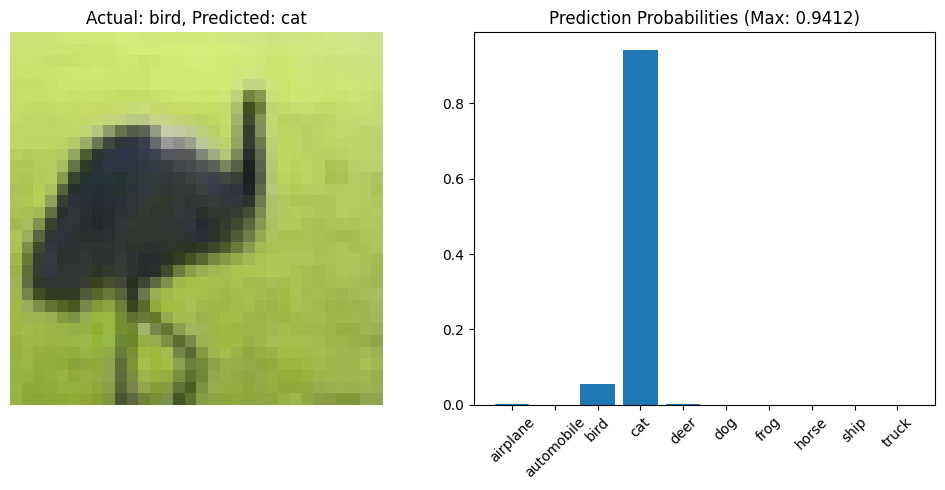

Predicted Class: cat (Probability: 0.9412)
Actual Class: bird

All Prediction Probabilities:
  airplane: 0.001228
  automobile: 0.000002
  bird: 0.055100
  cat: 0.941179
  deer: 0.001283
  dog: 0.000134
  frog: 0.000871
  horse: 0.000146
  ship: 0.000053
  truck: 0.000004


In [22]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# CIFAR-10 데이터셋 로드 (코랩에서)
(_, _), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# 클래스 이름 정의 (영어로)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# 코랩에서 저장한 TFLite 모델 불러오기
with open("/content/saved_model/cifar10_model/model.tflite", "rb") as f:
    tflite_model = f.read()

# 인터프리터 초기화
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

# 입력 및 출력 텐서 정보 가져오기
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("입력 텐서 정보:", input_details)
print("출력 텐서 정보:", output_details)

# 테스트 이미지 준비 (임의로 선택)
image_index = 123  # 원하는 인덱스로 변경
test_image = test_images[image_index:image_index+1].astype(np.float32) / 255.0

# 입력 텐서 크기 확인 및 조정 (수정된 부분)
input_shape = input_details[0]['shape']
if not np.array_equal(input_shape[1:], test_image.shape[1:]):
    print(f"입력 크기 조정: {test_image.shape} -> {input_shape}")
    test_image = tf.image.resize(test_image, (input_shape[1], input_shape[2])).numpy()

# 예측 수행
interpreter.set_tensor(input_details[0]['index'], test_image)
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])

# 결과 분석
predictions = output_data[0]
predicted_class = np.argmax(predictions)
actual_class = test_labels[image_index][0]

# 결과 시각화
plt.figure(figsize=(10, 5))

# 이미지 표시
plt.subplot(1, 2, 1)
plt.imshow(test_images[image_index])
plt.title(f'Actual: {class_names[actual_class]}, Predicted: {class_names[predicted_class]}')
plt.axis('off')

# 예측 확률 그래프
plt.subplot(1, 2, 2)
plt.bar(range(10), predictions)
plt.xticks(range(10), class_names, rotation=45)
plt.title(f'Prediction Probabilities (Max: {predictions[predicted_class]:.4f})')

plt.tight_layout()
plt.show()

print(f"Predicted Class: {class_names[predicted_class]} (Probability: {predictions[predicted_class]:.4f})")
print(f"Actual Class: {class_names[actual_class]}")
print("\nAll Prediction Probabilities:")
for i, prob in enumerate(predictions):
    print(f"  {class_names[i]}: {prob:.6f}")